In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 19

# Crypten

In [11]:
crypten_data = pd.read_csv('../chz-eab-nn-experiments/crypten_experiments/datasize_cifar_nn.csv',
                           skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']

# crypten_data = crypten_data.drop(index=range(14))

print(crypten_data)

mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].sum()
print(mean_crypten)

# stdev_crypten = crypten_data.groupby('data_size')['epoch_duration'].std()
# print(stdev_crypten)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0      1819.017764      0           4       6250    0.1000    1452.876921
1      1817.016536      1           4       6250    0.1000    1446.560707
2      1814.457554      2           4       6250    0.1046    1449.404645
3      3634.132885      0           4      12500    0.1027    1445.912936
4      3610.095333      1           4      12500    0.1698    1448.630184
5      3609.196545      2           4      12500    0.1851    1455.581509
6      7248.600064      0           4      25000    0.1953    1457.768201
7      7288.875419      1           4      25000    0.2708    1457.130322
8      7297.271319      2           4      25000    0.3157    1459.954482
9     14631.262090      0           4      50000    0.2437    1454.268548
10    14630.332842      1           4      50000    0.3565    1460.487742
11    14577.700550      2           4      50000    0.4193    1446.420724
data_size
6250      5450.491855
12500 

# Plaintext Torch

In [12]:
torch_data = pd.read_csv('../chz-eab-nn-experiments/torch_experiments/cifar/cifar_total_time.csv',
                         header=None,
                         )
torch_data.columns = ['total_duration', 'data_size']

# print(torch_data)

torch_medians = torch_data.groupby('data_size')['total_duration'].median()
print(torch_medians)
torch_stdev = torch_data.groupby('data_size')['total_duration'].std()
print(torch_stdev)

data_size
6250     17.128411
12500    24.985500
25000    40.790587
50000    72.623022
Name: total_duration, dtype: float64
data_size
6250     0.084017
12500    0.097859
25000    0.218884
50000    0.333135
Name: total_duration, dtype: float64


# NVFlare

In [13]:
nvflare_medians = []
nvflare_stdevs = []
for datasize in [6250, 12500, 25000, 50000]:
    nvflare_data = pd.read_csv(f'../chz-eab-nvflare-experiments/fl-nn/experiments/cifar/{datasize}/total_time.csv',
                header=None,
                )
    # total_duration, run_id, timestamp
    nvflare_data.columns = ['total_duration', 'run_id', 'timestamp']
    nvflare_medians.append(nvflare_data['total_duration'].median())
    nvflare_stdevs.append(nvflare_data['total_duration'].std())
print(nvflare_medians)
print(nvflare_stdevs)

[np.float64(43.812804), np.float64(47.315229), np.float64(59.5206405), np.float64(83.2826735)]
[np.float64(2.950955060892405), np.float64(1.4931636076071837), np.float64(1.4436347054378214), np.float64(1.3395822531691703)]


# Data Station

In [14]:
ds_data = pd.read_csv('../datastation-escrow/examples/training_scenario/cifar/cifar_total_time.csv',
                        header=None,
                        )
# total_duration, data_size
ds_data.columns = ['total_duration', 'data_size']

ds_medians = ds_data.groupby('data_size')['total_duration'].median()
ds_stdevs = ds_data.groupby('data_size')['total_duration'].std()

print(ds_medians)
print(ds_stdevs)

data_size
6250     23.025263
12500    30.629205
25000    46.393899
50000    78.752173
Name: total_duration, dtype: float64
data_size
6250     0.812057
12500    1.097774
25000    0.306038
50000    0.571279
Name: total_duration, dtype: float64


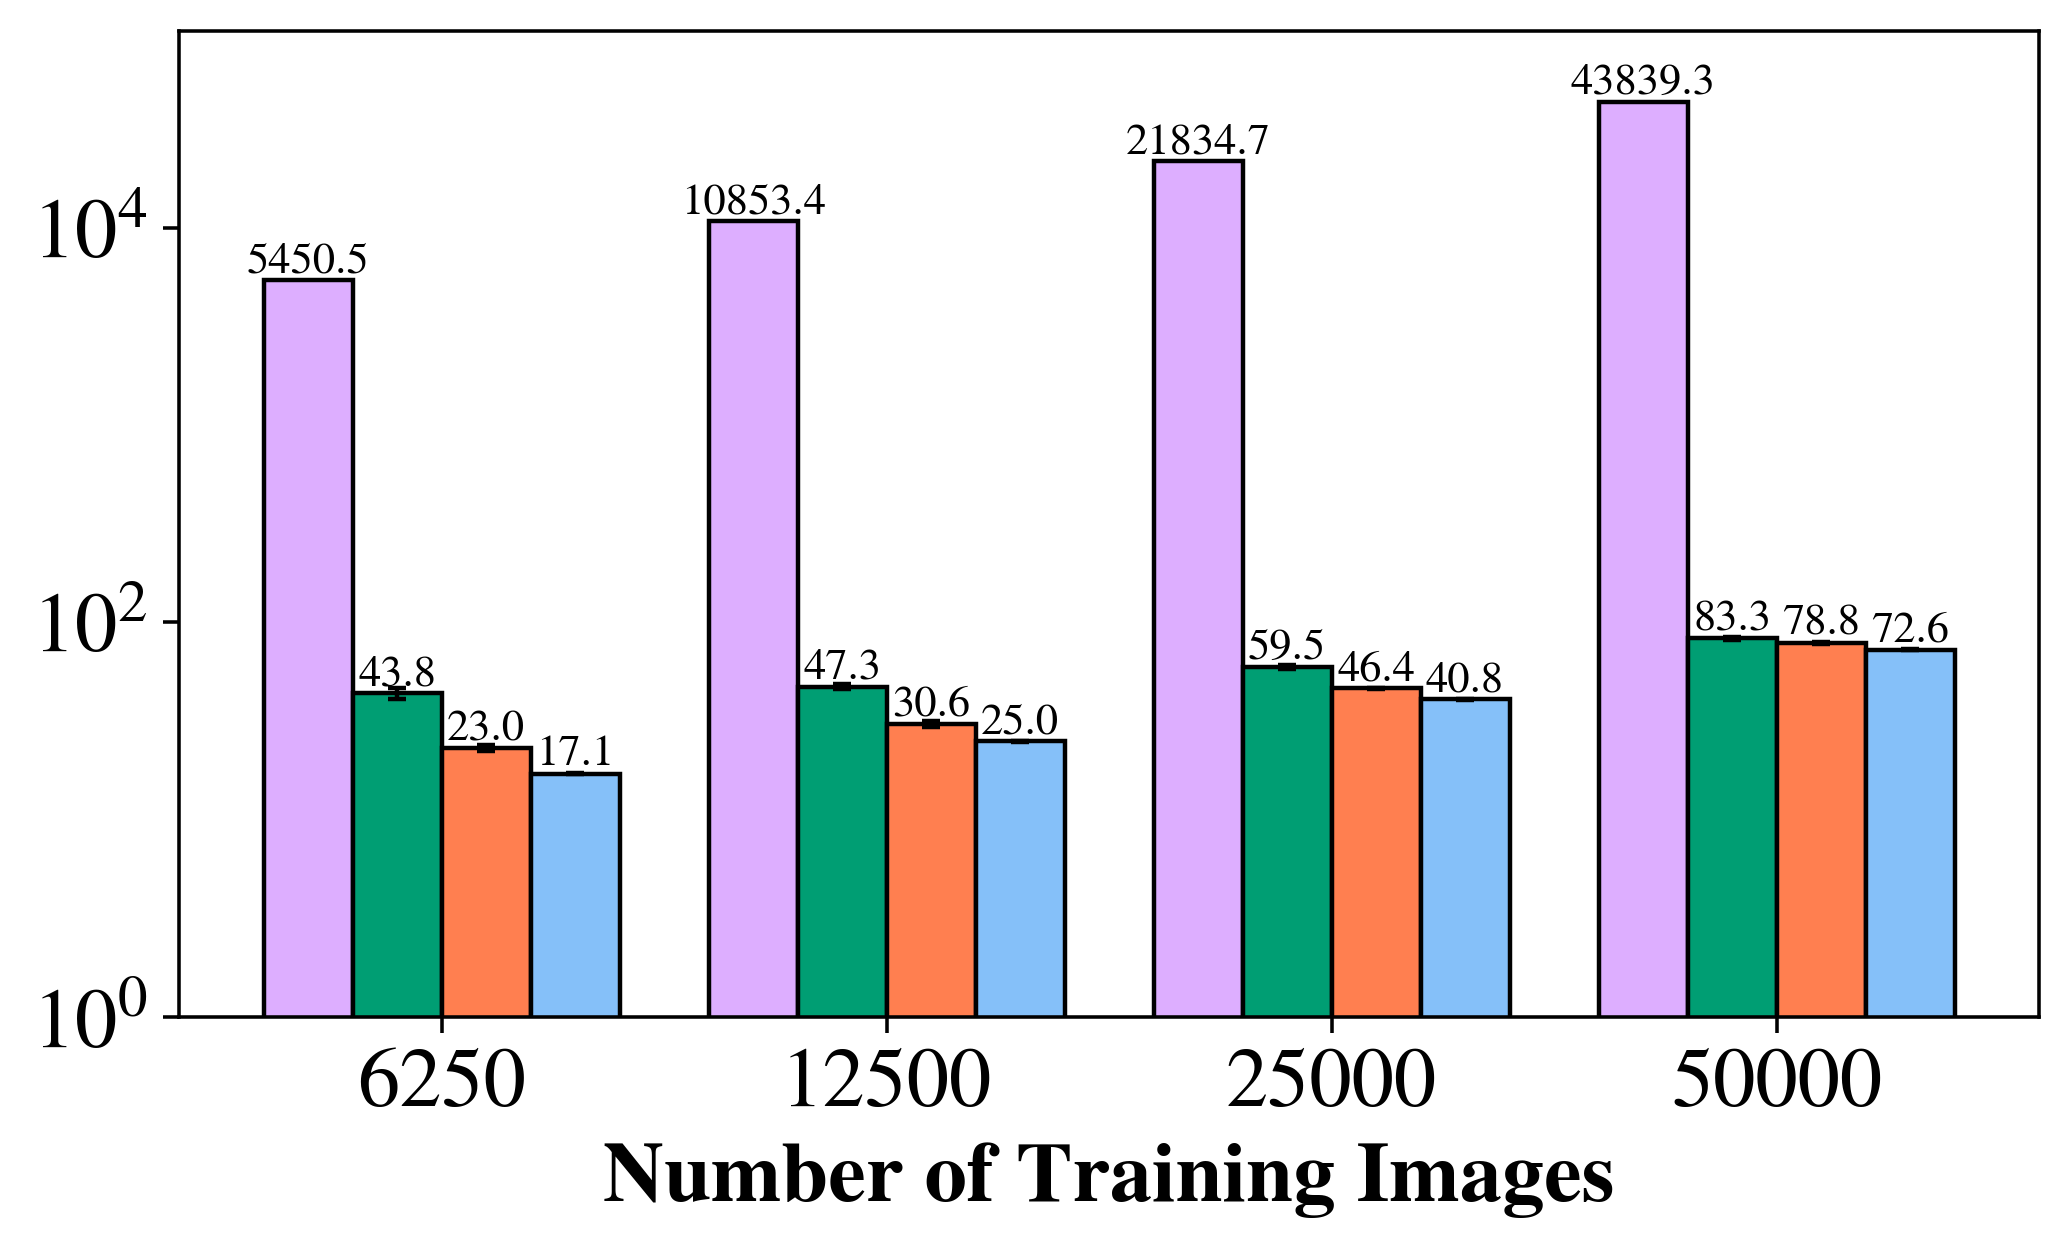

In [15]:
bar_label_font_size = 10
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

# Crypten
crypten_bar = plt.bar(x=X_axis-1.5*width, width=width, height = mean_crypten, label = "Crypten", color='#ddaeff')
plt.bar(x=X_axis-1.5*width,width=width,height=mean_crypten,
        # yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
crypten_label = map(lambda n: '{0:.1f}'.format(n),mean_crypten)
plt.bar_label(crypten_bar, crypten_label, fontsize=bar_label_font_size)

# NVFlare
nvflare_bar = plt.bar(x=X_axis-0.5*width, width=width, height = nvflare_medians, label = "NVFlare", color='#009E73')
plt.bar(x=X_axis-0.5*width,width=width,height=nvflare_medians,yerr=nvflare_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
nvflare_label = map(lambda n: '{0:.1f}'.format(n),nvflare_medians)
plt.bar_label(nvflare_bar, nvflare_label, fontsize=bar_label_font_size)

# Data Station
ds_bar = plt.bar(x=X_axis+0.5*width, width=width, height = ds_medians, label = "DS", color='coral')
plt.bar(x=X_axis+0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.1f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size)

# Torch
torch_bar = plt.bar(x=X_axis+1.5*width, width=width, height = torch_medians, label = "Torch", color='#85C0F9')
plt.bar(x=X_axis+1.5*width,width=width,height=torch_medians,
        yerr=torch_stdev,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
torch_label = map(lambda n: '{0:.1f}'.format(n),torch_medians)
plt.bar_label(torch_bar, torch_label, fontsize=bar_label_font_size)


plt.yscale('log')
plt.ylim(1, 100000)

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
# plt.title("Basic NN Training Time on FashionMNIST")
# plt.legend(ncol=4, loc='upper left')



plt.xticks(X_axis, ["6250", "12500", "25000", "50000"])

plt.savefig("datasize_cifar_nn.pdf", bbox_inches='tight')

plt.show()

# Accuracy

## Data Station

In [16]:
ds_acc = pd.read_csv('../datastation-escrow/examples/training_scenario/cifar/cifar.csv',
                        # header=None,
                        )
# # total_duration, data_size
# ds_data.columns = ['total_duration', 'data_size']
# print(ds_data)
# select epoch 2
# print(ds_acc)
ds_acc = ds_acc[ds_acc['epoch'] == '2']
# print(ds_acc)

ds_acc_medians = ds_acc.groupby('data_size')['accuracy'].median()
ds_acc_stdevs = ds_acc.groupby('data_size')['accuracy'].std()

print(ds_acc_medians)
print(ds_acc_stdevs)

TypeError: agg function failed [how->median,dtype->object]

## Plaintext

In [8]:
torch_acc = pd.read_csv('../chz-eab-nn-experiments/torch_experiments/cifar/cifar.csv',)

# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']
torch_acc = torch_acc[torch_acc['epoch'] == 2]

torch_acc_medians = torch_acc.groupby('data_size')['accuracy'].median()
print(torch_acc_medians)

torch_acc_stdevs = torch_acc.groupby('data_size')['accuracy'].std()
print(torch_acc_stdevs)

data_size
6250     0.1147
12500    0.1856
25000    0.3018
50000    0.4262
Name: accuracy, dtype: float64
data_size
6250     0.021214
12500    0.031401
25000    0.016942
50000    0.012006
Name: accuracy, dtype: float64


## NVFlare

In [9]:
nvflare_acc_medians = []
nvflare_acc_stdevs = []
for datasize in [6250, 12500, 25000, 50000]:
    nvflare_acc = pd.read_csv(f'../chz-eab-nvflare-experiments/fl-nn/experiments/cifar/{datasize}/datasize_cifar_nn.csv',)
    nvflare_acc.columns = ['accuracy', 'epoch', 'batch_size', 'data_size', 'site']

    nvflare_acc = nvflare_acc[nvflare_acc['batch_size'] != 4.0]
    nvflare_acc = nvflare_acc[nvflare_acc['site'] == 'site-1']
    # print(nvflare_acc)
    
    # get every third element
    nvflare_acc = nvflare_acc.iloc[::3, :]
    # print(nvflare_acc)

    nvflare_acc_median = nvflare_acc['accuracy'].median()
    nvflare_acc_medians.append(nvflare_acc_median)
    print(nvflare_acc_median)
    
    nvflare_acc_stdev = nvflare_acc['accuracy'].std()
    nvflare_acc_stdevs.append(nvflare_acc_stdev)
print(nvflare_acc_medians)
print(nvflare_acc_stdevs)

0.10015
0.13885
0.1958
0.30265
[0.10015, 0.13885, 0.1958, 0.30265]
[0.011763318692727264, 0.03319608410641232, 0.032331539469138255, 0.025695386529275808]


## Crypten

In [10]:
crypten_acc = crypten_data[crypten_data['epoch'] == 2]
crypten_acc_medians = crypten_acc.groupby('data_size')['accuracy'].median()
print(crypten_acc_medians)

data_size
6250     0.1046
12500    0.1851
25000    0.3157
50000    0.4193
Name: accuracy, dtype: float64


In [11]:
# Data Parsing for output
for idx, a in enumerate([6250, 12500, 25000, 50000]):
    crypten_acc_median = crypten_acc_medians[a]
    nvflare_acc_median = nvflare_acc_medians[idx]
    ds_acc_median = ds_acc_medians[str(a)]
    torch_acc_median = torch_acc_medians[a]
    
    nvflare_acc_stdev = nvflare_acc_stdevs[idx]
    ds_acc_stdev = ds_acc_stdevs[str(a)]
    torch_acc_stdev = torch_acc_stdevs[a]
    out = f"CIFAR 2-Agent {a} & ${crypten_acc_median:.4f}$ & \makecell{{${nvflare_acc_median:.4f}$\\\\$\pm {nvflare_acc_stdev:.4f}$}} & \makecell{{${ds_acc_median:.4f}$\\\\$\pm {ds_acc_stdev:.4f}$}} & \makecell{{${torch_acc_median:.4f}$\\\\$\pm {torch_acc_stdev:.4f}$}} \\\\"
    print(out)
    print("\hline")

CIFAR 2-Agent 6250 & $0.1046$ & \makecell{$0.1002$\\$\pm 0.0118$} & \makecell{$0.1111$\\$\pm 0.0184$} & \makecell{$0.1147$\\$\pm 0.0212$} \\
\hline
CIFAR 2-Agent 12500 & $0.1851$ & \makecell{$0.1389$\\$\pm 0.0332$} & \makecell{$0.1971$\\$\pm 0.0320$} & \makecell{$0.1856$\\$\pm 0.0314$} \\
\hline
CIFAR 2-Agent 25000 & $0.3157$ & \makecell{$0.1958$\\$\pm 0.0323$} & \makecell{$0.3079$\\$\pm 0.0175$} & \makecell{$0.3018$\\$\pm 0.0169$} \\
\hline
CIFAR 2-Agent 50000 & $0.4193$ & \makecell{$0.3026$\\$\pm 0.0257$} & \makecell{$0.4273$\\$\pm 0.0133$} & \makecell{$0.4262$\\$\pm 0.0120$} \\
\hline
